In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt
import os
import cv2
import random
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
path = 'TMN'
folder_name = []
folder_paths  =[]
for root, folder, files in os.walk(path):
    folder_name.extend(folder)
    full_paths = [path+'/'+ f for f in folder]
    folder_paths.extend(full_paths)
print(folder_name)
print(folder_paths)

['Maahi', 'Mostafijur', 'Nura', 'Tauhid']
['TMN/Maahi', 'TMN/Mostafijur', 'TMN/Nura', 'TMN/Tauhid']


In [3]:
folder_path=[]
for i in folder_paths:
    folder_path.append(i+'/')
folder_path

['TMN/Maahi/', 'TMN/Mostafijur/', 'TMN/Nura/', 'TMN/Tauhid/']

In [4]:
persons = [[] for _ in folder_path]
for i in range(len(folder_path)):
    for _, _, file_name in os.walk(folder_path[i]):
        persons[i].extend(file_name)

In [5]:
person_1=[]
person_2=[]
person_3=[]
person_4=[]
for i in range(len(persons)):
    for j in range(len(persons[i])):
        if(i == 0):
            person = persons[i][j]
            label = folder_name[i]
            classification=0
            person_1.append([person, label,classification])
        elif(i == 1):
            person = persons[i][j]
            label = folder_name[i]
            classification=1
            person_2.append([person, label, classification])
        elif(i == 2):
            person = persons[i][j]
            label = folder_name[i]
            classification=2
            person_3.append([person, label, classification])
        elif(i == 3):
            person = persons[i][j]
            label = folder_name[i]
            classification=3
            person_4.append([person, label, classification])

In [6]:
print(len(person_1), len(person_2), len(person_3), len(person_4))

270 205 221 202


In [7]:
full_data = []
for i in range(4):
    if i == 0:
        for i in range(len(person_1)):
            full_data.append(person_1[i])
    elif i == 1:
        for i in range(len(person_2)):
            full_data.append(person_2[i])
    if i == 2:
        for i in range(len(person_3)):
            full_data.append(person_3[i])
    if i == 3:
        for i in range(len(person_4)):
            full_data.append(person_4[i])

In [8]:
random.shuffle(full_data)
len(full_data)


898

In [9]:
img_path = 'TMN/Mostafijur/Mostafij_1.jpg'
os.path.exists(img_path)

True

(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)


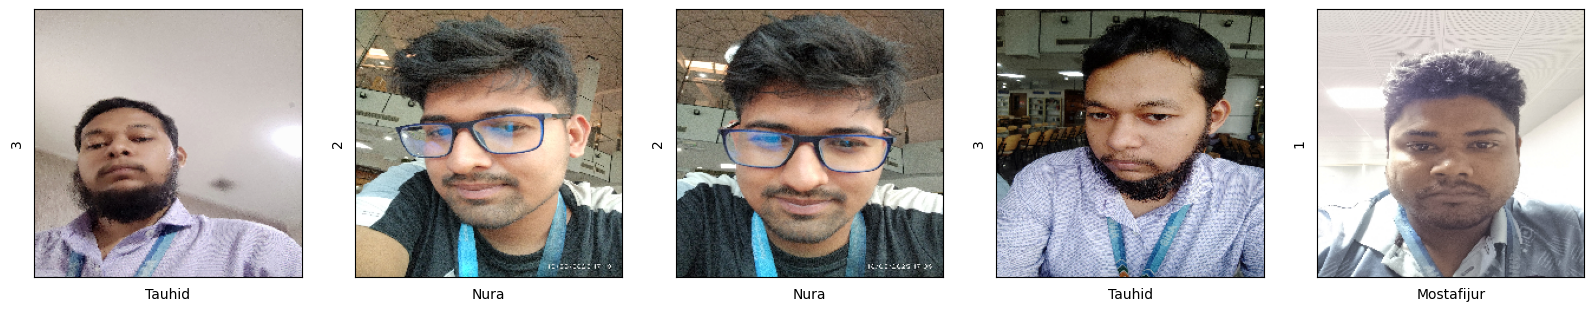

In [10]:
plt.figure(figsize=(20,10))
c=0
for i in range(5):
    plt.subplot(1,5,c+1)
    if(full_data[i][2] == 0):
        img_path = os.path.join(folder_path[0], full_data[i][0])
    elif(full_data[i][2]==1):
        img_path = os.path.join(folder_path[1], full_data[i][0])
    elif(full_data[i][2]==2):
        img_path = os.path.join(folder_path[2], full_data[i][0])
    elif(full_data[i][2]==3):
        img_path = os.path.join(folder_path[3], full_data[i][0])
    
    image = cv2.imread(img_path)
    image = cv2.resize(image, (227,227))
    image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(image.shape)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(full_data[i][1])
    plt.ylabel(full_data[i][2])
    c+=1

In [11]:
len(full_data)

898

In [12]:
round((len(full_data)*.15))

135

In [13]:

test_size = round((len(full_data)*.15))

test_data = random.sample(full_data, test_size)

train_data = [data for data in full_data if data not in test_data]

print(f"Test Data (20 samples): {test_data}")
print(f"Train Data ({len(train_data)} samples): {train_data}")


Test Data (20 samples): [['Maahi_86.jpg', 'Maahi', 0], ['Maahi_00043.jpg', 'Maahi', 0], ['Maahi_0141.jpg', 'Maahi', 0], ['tauhid_262.jpg', 'Tauhid', 3], ['Maahi_52.jpg', 'Maahi', 0], ['Maahi_00071.jpg', 'Maahi', 0], ['nura_155.jpg', 'Nura', 2], ['Maahi_85.jpg', 'Maahi', 0], ['tauhid_26.jpg', 'Tauhid', 3], ['Maahi_00087.jpg', 'Maahi', 0], ['Maahi_43.jpg', 'Maahi', 0], ['Maahi_00069.jpg', 'Maahi', 0], ['tauhid_27.jpg', 'Tauhid', 3], ['Mostafij_142.jpg', 'Mostafijur', 1], ['Maahi_00034.jpg', 'Maahi', 0], ['Maahi_00099.jpg', 'Maahi', 0], ['Maahi_0136.jpg', 'Maahi', 0], ['nura_61.jpg', 'Nura', 2], ['tauhid_52.jpg', 'Tauhid', 3], ['nura_68.jpg', 'Nura', 2], ['Maahi_0153.jpg', 'Maahi', 0], ['Mostafij_132.jpg', 'Mostafijur', 1], ['Mostafij_107.jpg', 'Mostafijur', 1], ['Mostafij_103.jpg', 'Mostafijur', 1], ['Maahi_68.jpg', 'Maahi', 0], ['tauhid_51.jpg', 'Tauhid', 3], ['tauhid_207.jpg', 'Tauhid', 3], ['tauhid_306.jpg', 'Tauhid', 3], ['tauhid_264.jpg', 'Tauhid', 3], ['tauhid_261.jpg', 'Tauhid', 3

In [14]:
img_path ='TMN/Maahi/Maahi_00036.jpg'
print(cv2.imread(img_path))

None


In [15]:
image_shape=(227,227)

In [16]:

X_train = []
Y_train=[]
for data in train_data:
    label = data[2]  
    Y_train.append(label)
    if label == 0:
        img_path = os.path.join(folder_path[0], data[0])
    elif label == 1:
        img_path = os.path.join(folder_path[1], data[0])
    elif label == 2:
        img_path = os.path.join(folder_path[2], data[0])
    elif label == 3:
        img_path = os.path.join(folder_path[3], data[0])
    else:
        continue  
    image = cv2.imread(img_path)
    image = cv2.resize(image,image_shape)
    if image is not None:  
        X_train.append(image)

X_train = np.array(X_train)
Y_train=np.array(Y_train)
Y_train = np.reshape(Y_train, (-1, 1))
print(f"Shape of X is : {X_train.shape}")
print(f"Shape of Y is : {Y_train.shape}")

Shape of X is : (763, 227, 227, 3)
Shape of Y is : (763, 1)


In [17]:
X_train.shape, Y_train.shape

((763, 227, 227, 3), (763, 1))

In [18]:
test = np.reshape(Y_train, (-1,1))

In [19]:
test.shape

(763, 1)

In [20]:
X_test =[]
Y_test=[]
for data in test_data:
    label = data[2]
    if label == 0:
        img_path = os.path.join(folder_path[0],data[0])
    elif label == 1:
        img_path = os.path.join(folder_path[1],data[0])
    elif label == 2:
        img_path = os.path.join(folder_path[2],data[0])
    elif label == 3:
        img_path = os.path.join(folder_path[3],data[0])
    image = cv2.imread(img_path)
    image = cv2.resize(image, image_shape)
    X_test.append(image)
    Y_test.append(label)

X_test = np.array(X_test)
Y_test = np.array(Y_test)
Y_test = np.reshape(Y_test, (-1,1))

In [21]:

print(f"Shape of X is : {X_test.shape}")
print(f"Shape of Y is : {Y_test.shape}")

Shape of X is : (135, 227, 227, 3)
Shape of Y is : (135, 1)


In [22]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU : {len(gpu_device)}")

Number of GPU : 1


In [23]:
#(X_train, Y_train),(X_test, Y_test) = cifar100.load_data()

In [24]:
print(f"Shape of Train data : {X_train.shape} and label : {Y_train.shape}")
print(f"Shape of Test data : {X_test.shape} and label : {Y_test.shape}")

Shape of Train data : (763, 227, 227, 3) and label : (763, 1)
Shape of Test data : (135, 227, 227, 3) and label : (135, 1)


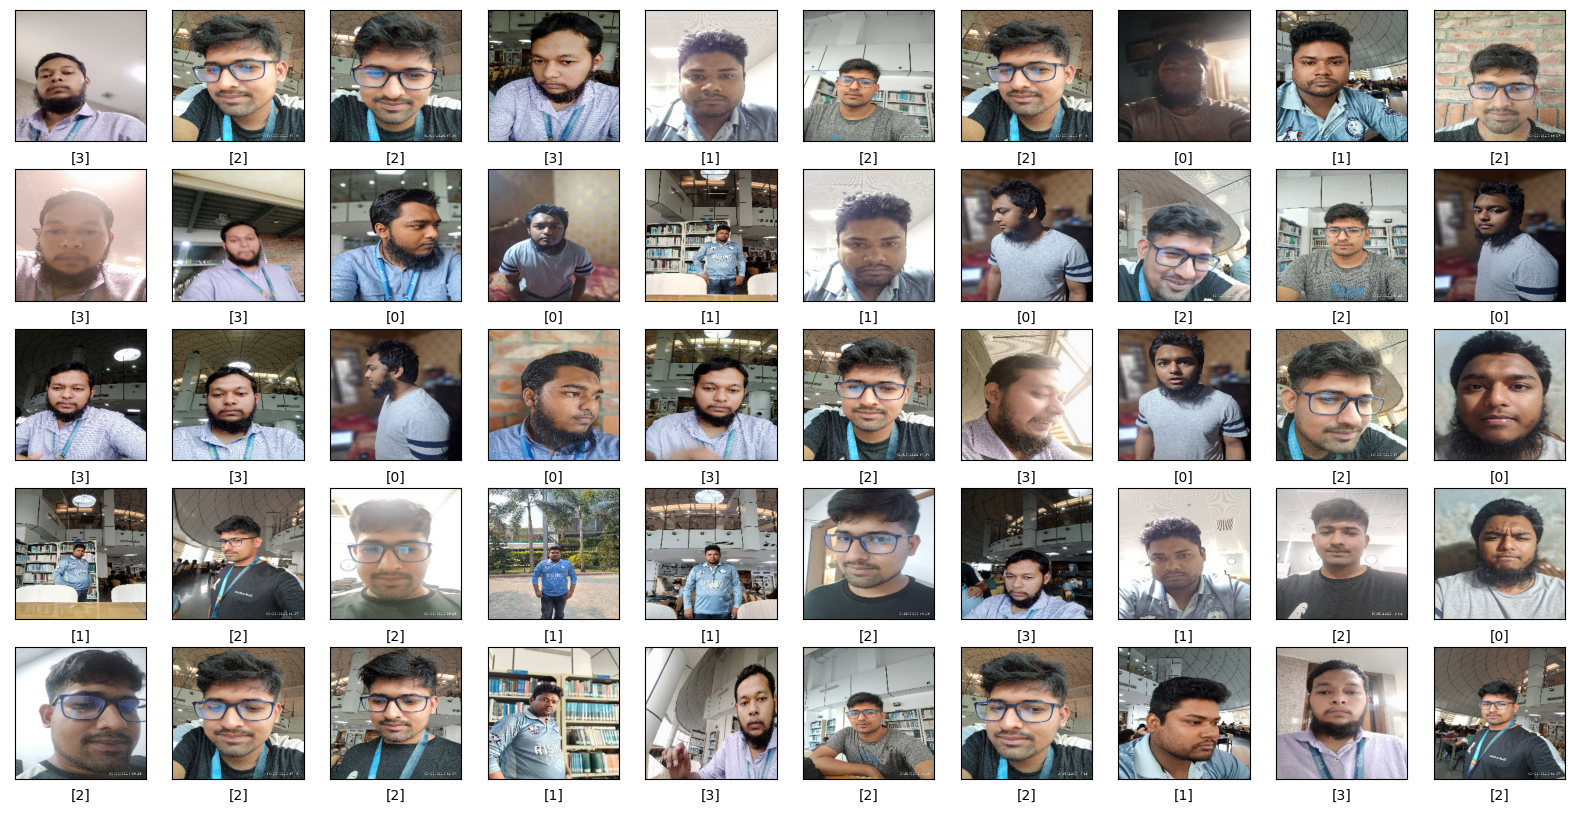

In [25]:
i = 0
plt.figure(figsize=(20,10))
for img in range(50):
    plt.subplot(5, 10, i+1)
    image = cv2.cvtColor(X_train[img],cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.xlabel(Y_train[img])
    plt.xticks([])
    plt.yticks([])
    i +=1
plt.show()

In [26]:
train_mean = np.mean(X_train, axis=0)
test_mean = np.mean(X_test, axis=0)
train_mean.shape, test_mean.shape

((227, 227, 3), (227, 227, 3))

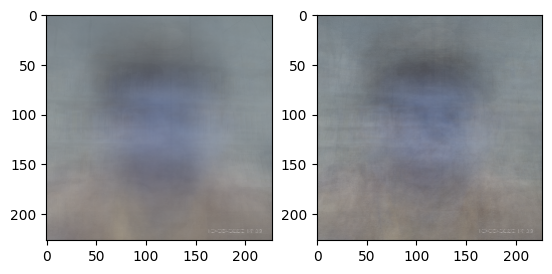

In [27]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(train_mean.astype('uint8'))
plt.subplot(1,2,2)
plt.imshow(test_mean.astype('uint8'))
plt.show()


In [28]:
#X_train_norm, X_test_norm = X_train - train_mean, X_test - test_mean
X_train_norm, X_test_norm = X_train , X_test 

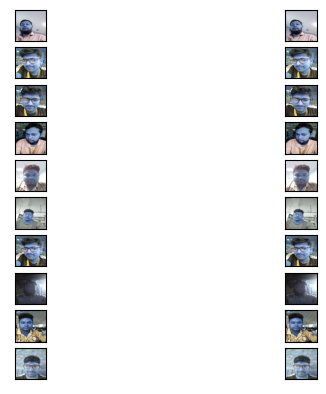

In [29]:
plt.figure()
c =0
for i in range(10):
    plt.subplot(10, 2,c+1 )
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    plt.subplot(10, 2,c+2 )
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    c+=2

plt.show()

In [30]:
X_train_norm.shape[1:]

(227, 227, 3)

In [31]:
def conv_blocks(X, filters, s=2):
    f1, f2, f3 = filters
    X_copy = X
    
    # 1st Layer
    X = layers.Conv2D(filters=f1, kernel_size=(1,1), strides=(s,s), padding='valid')(X)
    X = layers.BatchNormalization(axis=3)(X)
    X = layers.Activation('relu')(X)
    
    # 2nd Layer
    X = layers.Conv2D(filters=f2, kernel_size=(3,3), strides=(1,1), padding='same')(X)
    X = layers.BatchNormalization(axis=3)(X)
    X = layers.Activation('relu')(X) 
    
    # 3rd Layer
    X = layers.Conv2D(filters=f3, kernel_size=(1,1), strides=(1,1), padding='valid')(X)
    X = layers.BatchNormalization(axis=3)(X)
    
    ### match the dimension
    X_copy = layers.Conv2D(filters=f3, kernel_size=(1,1), strides=(s,s), padding='valid')(X_copy)
    X_copy = layers.BatchNormalization(axis=3)(X_copy)
    
    # Add the Skip COnnection
    X = layers.Add()([X, X_copy])
    X = layers.Activation('relu')(X)
    
    return X

def identity_block(X, filters):
    f1, f2, f3 = filters
    X_copy = X
    
    # 1st Layer
    X = layers.Conv2D(filters=f1, kernel_size=(1,1), strides=(1,1), padding='valid')(X)
    X = layers.BatchNormalization(axis=3)(X)
    X = layers.Activation('relu')(X)
    
    # 2nd Layer
    X = layers.Conv2D(filters=f2, kernel_size=(3,3), strides=(1,1), padding='same')(X)
    X = layers.BatchNormalization(axis=3)(X)
    X = layers.Activation('relu')(X) 
    
    # 3rd Layer
    X = layers.Conv2D(filters=f3, kernel_size=(1,1), strides=(1,1), padding='valid')(X)
    X = layers.BatchNormalization(axis=3)(X)
    
    # Add the Skip COnnection
    X = layers.Add()([X, X_copy])
    X = layers.Activation('relu')(X)
    
    return X

In [32]:
IMG_SIZE=227

In [33]:
def ResNet50():
    X_input = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    X = layers.ZeroPadding2D((3,3))(X_input)
    
    # Satge Conv1
    X = layers.Conv2D(64, (7,7), strides=(2,2))(X)
    X = layers.BatchNormalization(axis=3)(X)
    X = layers.Activation('relu')(X) 
    X = layers.MaxPooling2D((3,3), strides=(2,2))(X)
    
    # stage Conv2_x
    X = conv_blocks(X, filters=[64,64,256], s=1)
    X = identity_block(X, filters=[64,64,256])
    X = identity_block(X, filters=[64,64,256])
    
    # stage Conv3_x
    X = conv_blocks(X, filters=[128,128,512], s=2)
    X = identity_block(X, filters=[128,128,512])
    X = identity_block(X, filters=[128,128,512])
    X = identity_block(X, filters=[128,128,512])
    
    # stage Conv4_x
    X = conv_blocks(X, filters=[256,256,1024], s=2)
    X = identity_block(X, filters=[256,256,1024])
    X = identity_block(X, filters=[256,256,1024])
    X = identity_block(X, filters=[256,256,1024])
    X = identity_block(X, filters=[256,256,1024])
    X = identity_block(X, filters=[256,256,1024])
    
    # stage Conv5_x
    X = conv_blocks(X, filters=[512,512,2048], s=2)
    X = identity_block(X, filters=[512,512,2048])
    X = identity_block(X, filters=[512,512,2048])
    
    
    X = layers.AveragePooling2D((2,2))(X)
    X = layers.Flatten()(X)
    X = layers.Dense(4, activation='softmax', kernel_initializer='he_normal')(X)
    
    model = keras.Model(inputs=X_input, outputs=X, name='ResNet50')
    
    return model
   


def ResNet50():
    X_input = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    X = layers.ZeroPadding2D((3, 3))(X_input)
    
    # Stage Conv1
    X = layers.Conv2D(64, (7, 7), strides=(2, 2), kernel_initializer='he_normal')(X)
    X = layers.BatchNormalization(axis=-1)(X)
    X = layers.Activation('relu')(X)
    X = layers.MaxPooling2D((3, 3), strides=(2, 2))(X)
    
    # Stage Conv2_x
    X = conv_blocks(X, filters=[64, 64, 256], s=1)
    X = identity_block(X, filters=[64, 64, 256])
    X = identity_block(X, filters=[64, 64, 256])
    
    # Stage Conv3_x
    X = conv_blocks(X, filters=[128, 128, 512], s=2)
    X = identity_block(X, filters=[128, 128, 512])
    X = identity_block(X, filters=[128, 128, 512])
    X = identity_block(X, filters=[128, 128, 512])
    
    # Stage Conv4_x
    X = conv_blocks(X, filters=[256, 256, 1024], s=2)
    X = identity_block(X, filters=[256, 256, 1024])
    X = identity_block(X, filters=[256, 256, 1024])
    X = identity_block(X, filters=[256, 256, 1024])
    X = identity_block(X, filters=[256, 256, 1024])
    X = identity_block(X, filters=[256, 256, 1024])
    
    # Stage Conv5_x
    X = conv_blocks(X, filters=[512, 512, 2048], s=2)
    X = identity_block(X, filters=[512, 512, 2048])
    X = identity_block(X, filters=[512, 512, 2048])
    
    # Output Layers
    X = layers.AveragePooling2D((2, 2))(X)
    X = layers.Flatten()(X)
    X = layers.Dense(128, activation='relu', kernel_initializer='he_normal')(X)
    X = layers.Dense(64, activation='relu', kernel_initializer='he_normal')(X)
    X = layers.Dense(32, activation='relu', kernel_initializer='he_normal')(X)
    X = layers.Dense(4, activation='softmax', kernel_initializer='he_normal')(X)
    
    model = keras.Model(inputs=X_input, outputs=X, name='ResNet50_Custom')
    
    return model


In [34]:
model = ResNet50()
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 233, 233, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 114, 114, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                           

In [35]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)


In [36]:

early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=3,           
    restore_best_weights=True  
)

# Fit the model with EarlyStopping
h = model.fit(
    x=X_train,
    y=Y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=8,
    callbacks=[early_stop]  # Add the EarlyStopping callback here
)


Epoch 1/20
77/77 [==============================] - 26s 204ms/step - loss: 4.3293 - accuracy: 0.5738 - val_loss: 11625.5576 - val_accuracy: 0.1961
Epoch 2/20
77/77 [==============================] - 13s 172ms/step - loss: 1.7884 - accuracy: 0.6902 - val_loss: 2.6392 - val_accuracy: 0.4510
Epoch 3/20
77/77 [==============================] - 13s 173ms/step - loss: 0.7399 - accuracy: 0.8066 - val_loss: 1.0573 - val_accuracy: 0.7843
Epoch 4/20
77/77 [==============================] - 14s 176ms/step - loss: 0.4161 - accuracy: 0.8918 - val_loss: 0.8922 - val_accuracy: 0.7124
Epoch 5/20
77/77 [==============================] - 13s 173ms/step - loss: 0.8494 - accuracy: 0.8738 - val_loss: 33.7343 - val_accuracy: 0.2026
Epoch 6/20
77/77 [==============================] - 13s 172ms/step - loss: 0.6817 - accuracy: 0.8574 - val_loss: 1.6612 - val_accuracy: 0.5490
Epoch 7/20
77/77 [==============================] - 14s 176ms/step - loss: 0.2805 - accuracy: 0.9164 - val_loss: 0.7926 - val_accuracy: 0

In [37]:
train_loss = h.history['loss']
val_loss = h.history['val_loss']
train_acc = h.history['accuracy']
val_acc = h.history['val_accuracy']

In [38]:
epoch = range(1, len(val_acc)+1)
epoch

range(1, 14)

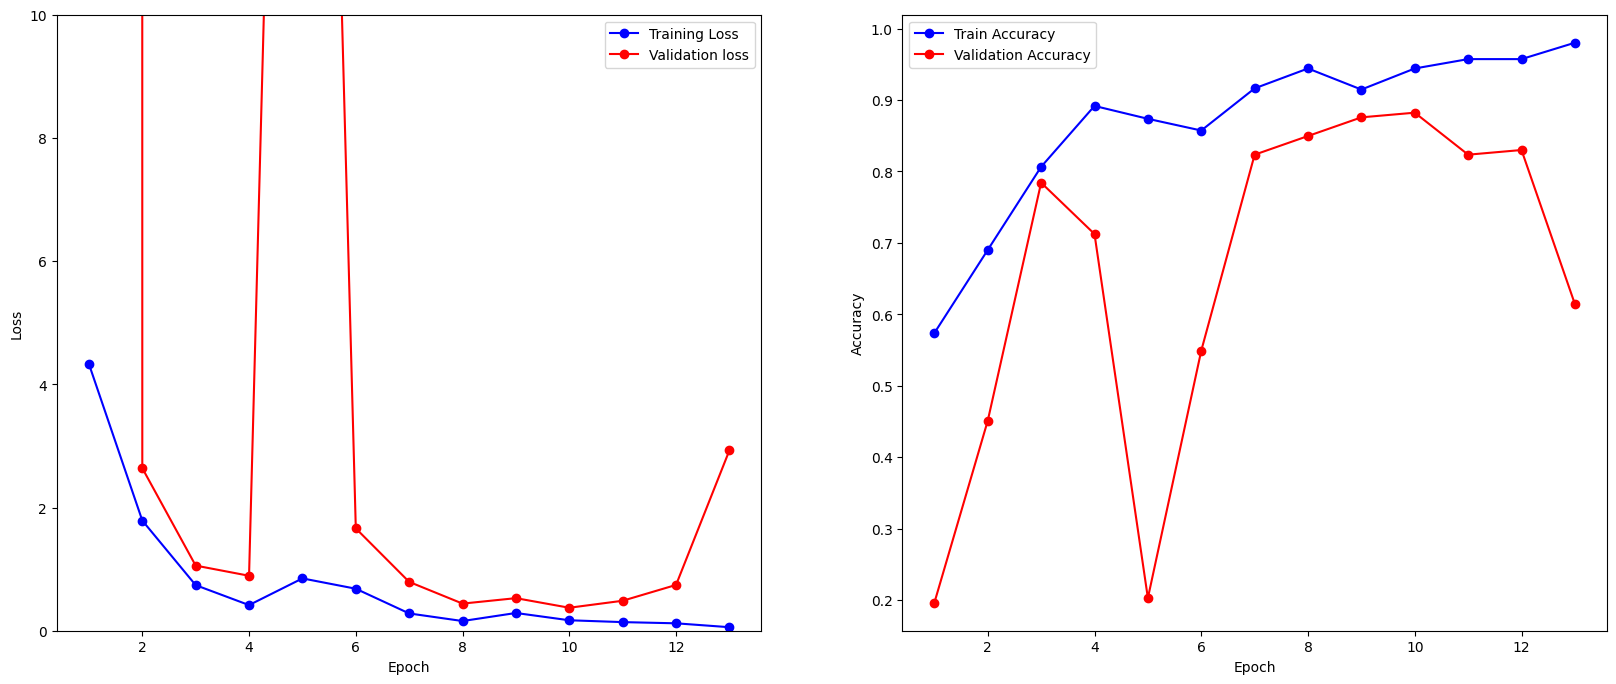

In [39]:
epoch = range(1, len(val_acc)+1)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(epoch, train_loss,'bo-', label='Training Loss')
plt.plot(epoch, val_loss,'ro-', label= 'Validation loss')
plt.ylim(0,10)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, train_acc,'bo-', label='Train Accuracy')
plt.plot(epoch, val_acc,'ro-', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [40]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

5/5 [==============================] - 2s 274ms/step - loss: 0.4320 - accuracy: 0.8741

Test Accuracy: 0.8740741014480591

Test Loss: 0.43198496103286743


In [41]:
probability = model.predict(X_test)

5/5 [==============================] - 1s 140ms/step


In [42]:
(probability[0].max() *100).round(2)

100.0

In [43]:
predicted_classes = probability[0].argmax()
predicted_classes

0

In [44]:
probability[0]

array([9.9999690e-01, 3.8553580e-10, 6.1098092e-07, 2.5260103e-06],
      dtype=float32)

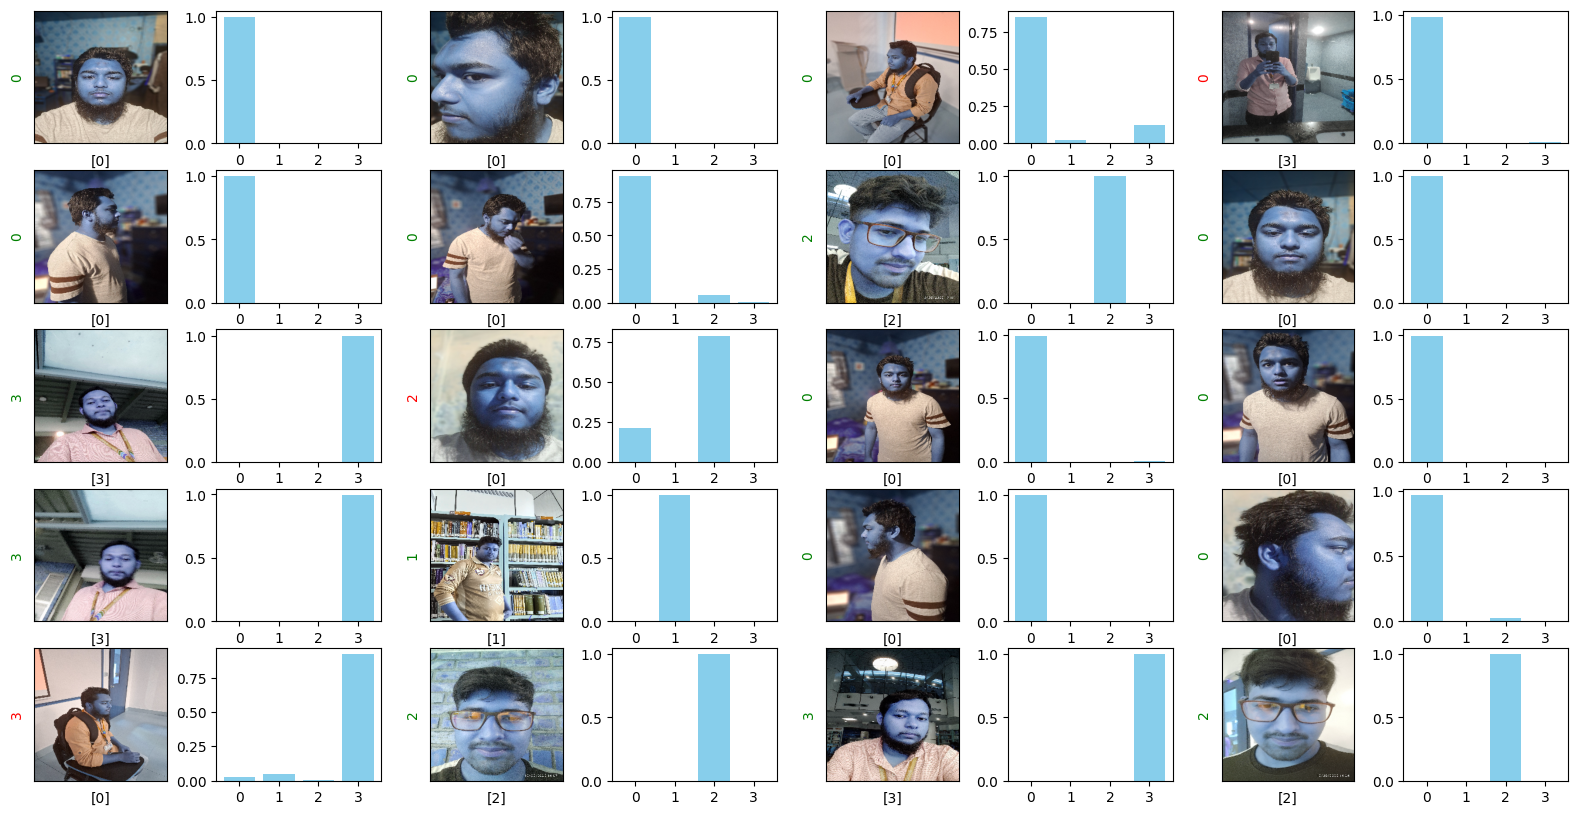

In [45]:
c=0
label=[0,1,2,3]
plt.figure(figsize=(20,10))
for i in range(20):
    plt.subplot(5,8,c+1)
    plt.imshow(X_test[i])
    plt.xlabel(Y_test[i])
    if(Y_test[i] == probability[i].argmax()):
        plt.ylabel(probability[i].argmax(), color='g')
    else:
        plt.ylabel(probability[i].argmax(), color='r')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(5,8,c+2)
    plt.bar(range(len(probability[i])), probability[i], color='skyblue')
    plt.xticks(range(len(label)), label)
    c+=2
plt.show()
    

In [46]:
probability[0]

array([9.9999690e-01, 3.8553580e-10, 6.1098092e-07, 2.5260103e-06],
      dtype=float32)

In [47]:
model.save("model.h5")